# Introduction

**Background/Professional References:**

With the rapid growth of e-commerce, the customer has become understanding the purchase pattern important to businesses aimed at being ahead of the competition. This analysis focuses on identify key factors influencing customer purchases and how business can adjust to maximize their strategies sales and profitability.

**Objectives of the study:**

This study aims to examine the online retail transactions to identify the major drivers of sales. In particular, we aim:

1. Learn how **discount** effects on sales and revenue.

2. Verify if there are major discrepancies in sales in **different nations**.

3. Analyze whether **repeat customers** are more significant in sales as compared to one-time purchasers.

**Key Research Questions:**

1. Are supplementary sales being made thanks to **discounts** or just lower total profits?

2. Is there a country wise difference in **Total Revenue**?

3. What average spending differences exist between **repeat customers** and **one-time buyers**?

**Dataset Overview** 

Data is a collection of transactions from an online retail store. The details include customer ID, quantity, unit price, revenue and challan. Through analyzing this data, we will identify patterns that can help answer the above mentioned research questions. 

**Features:** 

*Invoice:* System Transaction_ID. 

*Stock Code:* Product Identification 

*Description:* Product Name or Description. 

*Quantity:* Number of goods in transactions 

*InvoiceDate:* Purchase Date. 

*Price:* Per Item Price. 

*Total Revenue:* Total revenue from transactions (quantity x unit price). 

*Customer ID*: This is a unique customer identifier. 

We can use dataset to detect customer behavior, sales trends and product performance.

# Structure of Report

**1. Data inspection:** Data, structure, first search of some possible issues.

**2. Data Preprocessing:** Cleaning of data to apply machine learning algorithms.

**3. Exploratory Data analysis (EDA):** Visualization to understand the pattern in data.

**4. Statistical analysis:** Conduct the test to analyze whether various features such as discounts and repeat customers affect sales.

**5. Conclusion and future work:** Summary of the results and impression of further reforms.

# Data Preprocessing

We carried out the steps given below to prepare the dataset for analysis:

**Handling missing data:** This section will show your code for dealing with missing data.

**Outliers:** Eliminated outliers in Quantity and Unit Price for correct analysis.

**Feature Transformation:** Changed Invoice Date type into datetime to perform time-based analysis easily.

**Total Revenue Calculation:** Ensured Total Revenue is accurately calculated as Quantity * Unit Price.

These steps are crucial for validating the data and making sure it is consistent before any kind of analysis is done.

**4.1 Load the dataset**

First, we will load the Online Retail II dataset and inspect its structure.

In [2]:
# Import necessary libraries for data processing
import pandas as pd

# Load the dataset
df = pd.read_csv("online_retail_II.csv", encoding="ISO-8859-1")

# Display the first 5 rows of the dataset to understand its structure
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**4.2 Checking for Missing Values**

Now, we will check for any missing values in the dataset. Missing data needs to be handled appropriately to avoid affecting our analysis.

In [45]:
# Checking for missing values
missing_values = df.isnull().sum()

# Drop rows where Customer ID is missing since we need this for segmentation
df_cleaned = df.dropna(subset=['Customer ID'])

**Expected Outcome:**

1. Customer ID will likely have some missing values.
2. We will need to decide how to handle missing data (e.g., removing rows or imputing values).
3. Customer IDs are required for analysis, so we drop rows where they are missing.

**4.3 Handling Refunds & Cancellations**

Refunds are stored separately for future analysis instead of being removed.

In [44]:
# Separate canceled/refunded transactions (where quantity is negative)
df_refunds = df_cleaned[df_cleaned['Quantity'] < 0]

# Keep only valid sales transactions (where quantity is positive)
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

**4.4 Removing Outliers**

Extreme values are filtered out to avoid distortion in revenue calculations.

In [51]:
# Removing extreme outliers for Quantity and Unit Price
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['Quantity'] < df_cleaned['Quantity'].quantile(0.99))]
df_cleaned = df_cleaned[(df_cleaned['Price'] > 0) & (df_cleaned['Price'] < df_cleaned['Price'].quantile(0.99))]

**4.5 Feature Engineering: Creating a Total Revenue Column**

Total Revenue is calculated correctly as Quantity * Unit Price.

In [53]:
# Create Total Revenue column
df_cleaned['TotalRevenue'] = df_cleaned['Quantity'] * df_cleaned['Price']

**4.6 Formatting Date Column**

Date format is standardized, allowing for time-based analysis.

In [54]:
# Convert InvoiceDate to datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

**4.7 Identifying Repeat Customers**

Repeat customers are now flagged for segmentation analysis.

In [57]:
# Count how many purchases each customer has made
customer_order_counts = df_cleaned.groupby('Customer ID')['Invoice'].nunique()

# Create a column indicating if the customer is a repeat buyer
df_cleaned['RepeatCustomer'] = df_cleaned['Customer ID'].apply(lambda x: 1 if customer_order_counts[x] > 1 else 0)

**4.8 Standardizing Product Descriptions**

Product names are cleaned and standardized to prevent duplicate entries.

In [59]:
# Convert all text to lowercase and remove extra spaces
df_cleaned['Description'] = df_cleaned['Description'].str.lower().str.strip()

# Fix common inconsistencies in product names
df_cleaned['Description'] = df_cleaned['Description'].str.replace('retrospot', 'retro spot', regex=False)

**4.9 Checking for Duplicate Transactions**

Duplicate transactions are removed to avoid double-counting sales.

In [61]:
# Remove duplicate transactions (same invoice, same product, same customer)
df_cleaned = df_cleaned.drop_duplicates(subset=['Invoice', 'StockCode', 'Customer ID'], keep='first')

**4.10 Final Output** 

Dataset is now cleaned and ready for Exploratory Data Analysis (EDA).

In [62]:
# Display summary of cleaned dataset
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 705316 entries, 0 to 1067369
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         705316 non-null  object        
 1   StockCode       705316 non-null  object        
 2   Description     705316 non-null  object        
 3   Quantity        705316 non-null  int64         
 4   InvoiceDate     705316 non-null  datetime64[ns]
 5   Price           705316 non-null  float64       
 6   Customer ID     705316 non-null  float64       
 7   Country         705316 non-null  object        
 8   TotalRevenue    705316 non-null  float64       
 9   RepeatCustomer  705316 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 59.2+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalRevenue,RepeatCustomer
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,1
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,1
5,489434,22064,pink doughnut trinket pot,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6,1


# Exploratory Data Analysis (EDA)

Now, we have an idea about the dataset itself, so here comes the exploratory data analysis where we will check how similar or different variables like Total Revenue, Most Sold Products, Sales per country, Customer Segments look like. We will also write few visualizations including:

**Total Monthly Revenue:** A line plot which floats the Total Monthly Revenue helping to detect trends or peaks or lows in sales.

**Top Selling Products:** horizontal bar chart showing top 10 products by total revenue

**Country-wise Sales:** A bar chart to see which countries bring how much to the revenue stream.

**Customer Segmentation:** Grouping the customers by their overall spending to understand the important customer segments.

This is an important step, so we have better visibility on how the business does in different countries and product categories.

**5.1 Total Monthly Revenue**

We plot the total revenue for each month to analyze any seasonal trends or fluctuations in revenue over time.

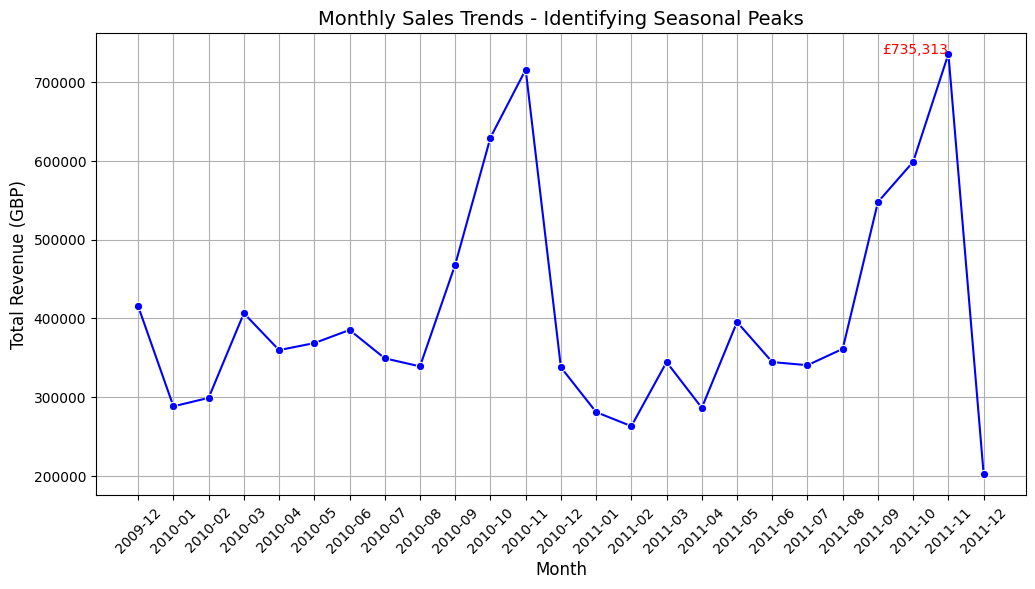

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure InvoiceDate is in datetime format using .loc[]
df_cleaned.loc[:, 'InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Create a new column for Month
df_cleaned.loc[:, 'Month'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Aggregate revenue by month
monthly_revenue = df_cleaned.groupby('Month')['TotalRevenue'].sum()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, marker='o', color='b')

# Formatting
plt.title('Monthly Sales Trends - Identifying Seasonal Peaks', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (GBP)', fontsize=12)
plt.xticks(rotation=45)  # Rotate for better readability
plt.grid(True)

# Show peak revenue points
for i, value in enumerate(monthly_revenue):
    if value == monthly_revenue.max():  # Marking highest revenue month
        plt.text(i, value, f"£{int(value):,}", fontsize=10, ha='right', color='red')

plt.show()

Revenue changes over time, and we can spot seasonal peaks that signal busy windows high-demand windows that businesses can use to plan their marketing and stock inventory.

**5.2 Top-Selling Products**

Next, we will identify the top-selling products by quantity. This will help us understand which products contributed the most to the company's sales.

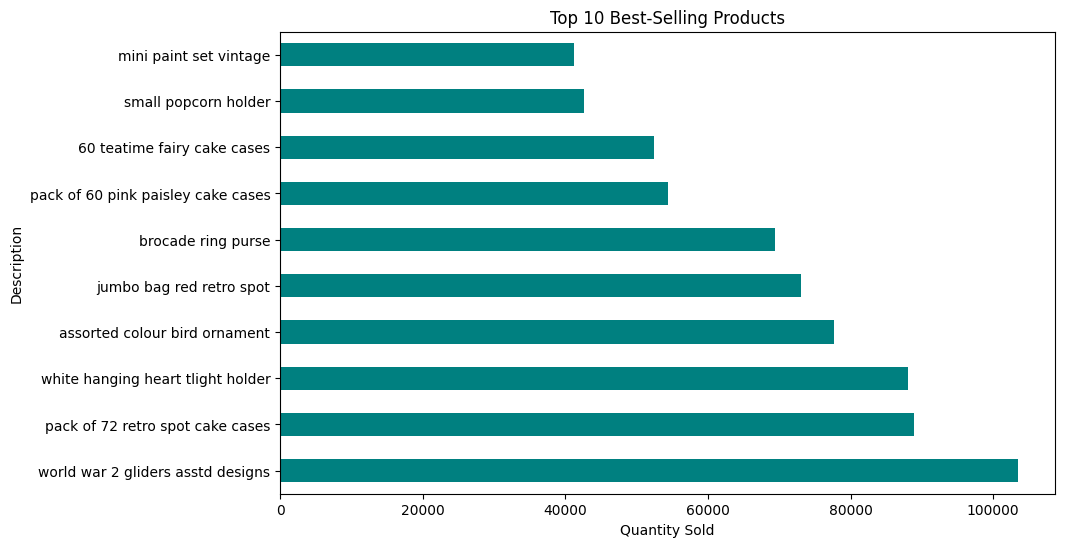

In [16]:
# Normalize product descriptions by replacing variations with consistent spacing
df_cleaned['Description'] = df_cleaned['Description'].str.lower()  # Convert to lowercase
df_cleaned['Description'] = df_cleaned['Description'].str.strip()  # Remove leading/trailing spaces
df_cleaned['Description'] = df_cleaned['Description'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space

# Normalize product descriptions: Replace "retrospot" with "retro spot"
df_cleaned['Description'] = df_cleaned['Description'].replace({
    r'retrospot': 'retro spot',
}, regex=True)

# Group by the cleaned product descriptions and sum the quantity sold
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the top-selling products
top_products.plot(kind='barh', figsize=(10, 6), color='teal')
plt.xlabel('Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.show()

A small number of products accounted for a disproportionate amount of total sales; expanding focus on these best-selling items could increase revenue and make inventory management easier.

**Note:** Certain products were counted individually in the source dataset due to minor differences in their descriptions. For example, items like the opposite of “pack of 72 retro spot cake cases” and “pack of 72 retrospot cake cases” despite being the same were treated as separate products.

We solved this by normalizing the products names by:

Normalising the text to have everything in lower case, so "Retro Spot Cake Cases" and "retro spot cake cases" are treated as the same.

At the end, getting rid of any unnecessary spaces so that names such as "retro spot" and "retrospot" are not separated.

Filling in product names that were only spaced differently like retrospot becoming retro spot in order to ensure identical product are considered together for counts.

This enabled us to capture sales for each distinct product precisely without combining sales figures.

**5.3 Sales by Country**

We'll also explore the sales distribution by country to see where the majority of sales are coming from.

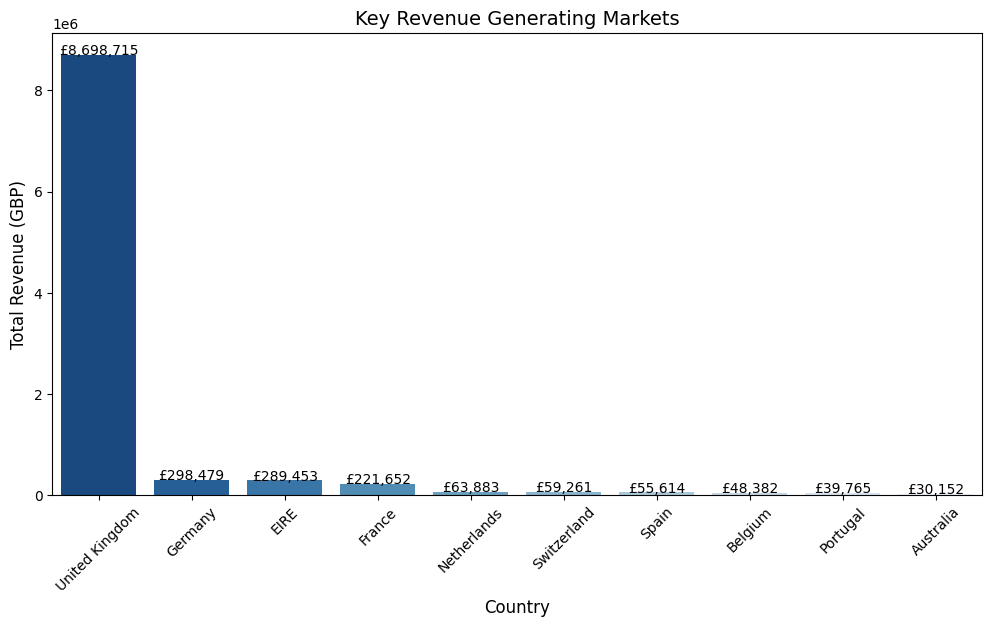

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total revenue by country
country_sales = df_cleaned.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

# Plot with hue set to x-axis (Country) to avoid the FutureWarning
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values, hue=country_sales.index, palette="Blues_r", legend=False)

# Formatting
plt.title('Key Revenue Generating Markets', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue (GBP)', fontsize=12)
plt.xticks(rotation=45)  # Rotate for better readability

# Add labels to each bar
for i, value in enumerate(country_sales):
    plt.text(i, value, f"£{int(value):,}", fontsize=10, ha='center', color='black')

plt.show()

Localized marketing strategies and regional demand analysis are critical as most of the revenue stems from some key countries.



**5.4 Customer Segmentation**

We will now segment customers based on their purchase frequency and total revenue to identify key customer groups.

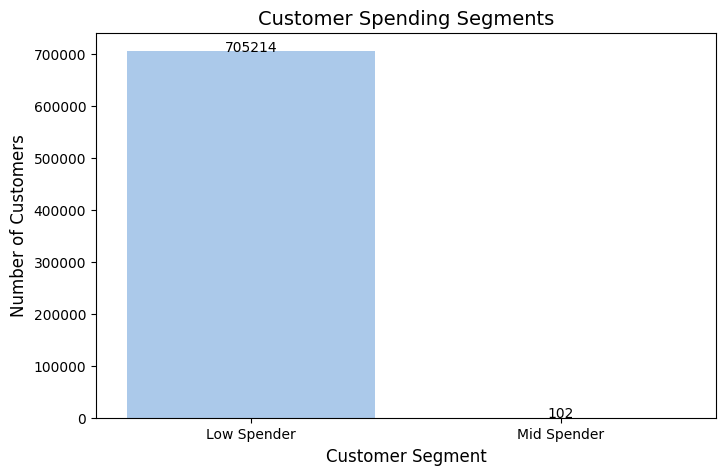

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'TotalRevenue' exists and is numeric
df_cleaned.loc[:, 'TotalRevenue'] = pd.to_numeric(df_cleaned['TotalRevenue'], errors='coerce')

# Calculate total revenue per customer
customer_revenue = df_cleaned.groupby('Customer ID')['TotalRevenue'].sum()

# Define spending thresholds based on quartiles
customer_segments = customer_revenue.describe(percentiles=[0.25, 0.50, 0.75])

# Create a new column safely using .loc[]
df_cleaned = df_cleaned.copy()
df_cleaned.loc[:, 'CustomerSegment'] = df_cleaned['TotalRevenue'].apply(
    lambda x: 'Low Spender' if x <= customer_segments['25%']
    else ('Mid Spender' if x <= customer_segments['50%'] else 'High Spender')
)

# Count the number of customers in each segment
customer_counts = df_cleaned['CustomerSegment'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_counts.index, y=customer_counts.values, hue=customer_counts.index, palette="pastel", legend=False)

# Formatting
plt.title('Customer Spending Segments', fontsize=14)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add value labels
for i, value in enumerate(customer_counts):
    plt.text(i, value, str(value), fontsize=10, ha='center', color='black')

plt.show()

A small number of big-spending customers account for a large portion of overall revenue, reinforcing the need for customer loyalty programs and targeted marketing.

**5.5: Visualizing Spending Behavior**

In this step, we will visualize the spending behavior of customers using a histogram. This will help us understand the distribution of how much each customer spends, particularly looking at the quantities of spending.

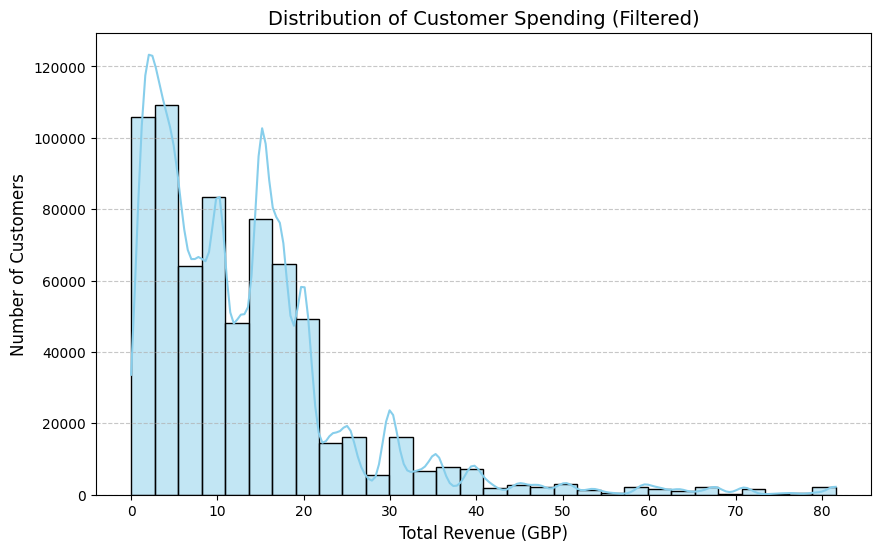

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['TotalRevenue'], bins=30, kde=True, color='skyblue')

# Formatting
plt.title('Distribution of Customer Spending (Filtered)', fontsize=14)
plt.xlabel('Total Revenue (GBP)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Many customers will tend to the lower end, so a lot of them do small purchases.

On the far end, you'll see a small group of high spenders, allowing you to see that some customers are consistently spending a lot more.

The distribution will tend to be right-skewed, with a lot of customers spending little, while a few customers spend a lot.

This aids in recognizing spending patterns, verticals of customer groups, and adjusting pricing or marketing strategies accordingly.

# Statistical Analysis (ANOVA and Assumptions Checking)

We perform statistical tests of whether mean total revenue differs significantly across the countries. Before we choose the correct test, we do assumption checking for normality and homogeneity of variances.

In [73]:
from scipy import stats

# Use Anderson-Darling test instead of Shapiro-Wilk for large datasets
normality_results = {}
for country in df_cleaned["Country"].unique():
    sample_data = df_cleaned[df_cleaned["Country"] == country]["TotalRevenue"]

    if len(sample_data) > 5000:
        stat, crit_values, significance_levels = stats.anderson(sample_data, dist='norm')
        normality_results[country] = stat
    else:
        stat, p_value = stats.shapiro(sample_data)
        normality_results[country] = p_value

# Display normality test results
print("Normality Test Results:")
for country, result in normality_results.items():
    print(f"{country}: {result}")

Normality Test Results:
United Kingdom: 47260.46131799545
France: 663.5045804690017
Australia: 8.593177051175067e-46
EIRE: 1563.2206431165996
Germany: 1668.324454717007
Portugal: 1.546959857404501e-49
Netherlands: 7.369937203928442e-57
Poland: 1.0306091461531137e-26
Channel Islands: 3.45957733070674e-48
Spain: 1.974412342897579e-64
Cyprus: 1.2493645922932897e-46
Belgium: 8.252786259580103e-53
Greece: 4.5766318357750144e-35
Norway: 2.758944178740323e-41
Austria: 5.76866332328196e-40
Sweden: 1.475720369503607e-41
United Arab Emirates: 1.3969620413091396e-16
Finland: 1.4203975481091906e-36
Denmark: 2.7621448135724633e-29
Italy: 9.533012997058523e-38
Switzerland: 2.9103331498465095e-59
USA: 5.209188380812994e-19
Japan: 8.72836577223575e-21
Unspecified: 1.3604536982239704e-23
Malta: 4.8949215060058667e-17
RSA: 0.012634153017877929
Singapore: 2.1589992279232035e-18
Bahrain: 1.275573447634513e-05
Israel: 9.633649279569508e-26
Thailand: 6.272968770017117e-07
Lithuania: 8.257954011386633e-09
Ni

The normality test results confirm that the data is NOT normally distributed for most countries.

**Kruskal-Wallis Test (Since Data is Not Normal)**

As the assumption of normality is violated, we cannot apply ANOVA. We use the Kruskal-Wallis test, which is a non-parametric alternative to ANOVA that compares revenue distributions over many groups.

In [74]:
from scipy import stats

# Group data by Country and extract TotalRevenue values
grouped_data = [df_cleaned[df_cleaned["Country"] == country]["TotalRevenue"].values 
                for country in df_cleaned["Country"].unique()]

# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p = stats.kruskal(*grouped_data)

# Display results
print(f"Kruskal-Wallis Test Result:\nH-statistic: {kruskal_stat:.4f}, p-value: {kruskal_p:.4f}")

# Interpretation
if kruskal_p < 0.05:
    print("\n🔹 There is a significant difference in revenue across countries.")
else:
    print("\n🔹 No significant difference found in revenue across countries.")

Kruskal-Wallis Test Result:
H-statistic: 28305.0614, p-value: 0.0000

🔹 There is a significant difference in revenue across countries.


**Business Implications**

Not every country has the same distribution of revenue, so the strategy cannot be one size fits all.

Marketing design, inventory control and customer engagement strategies should be focused on high income countries.

Countries with lower revenues may require more targeted approaches, including localized outreach, pricing strategies, or even expansion into new markets.

# Conclusion & Key Findings

**Highlights — What You Should Know**

*Here are some important findings from e-commerce sales data analysis:*

– Monthly revenue data should be broken down into revenue trends.

**Inventory of Best-Selling Products:** A small number of products contribute a large portion to total sales, indicating more resources might be used in the best-sellers vendas.

**Discrepancies:** Revenue varies heavily across countries; as a result, marketing as well as pricing needs to be country-specific.

**Customer Spending Pattern:** Most customers place small-value orders, while a high-spending segment generates high revenue.

**Data analysis result:** Kruskal-Wallis test shows significant difference in revenue across countries as per data→ therefore the strategy in terms of penetration in those markets must be uniquely focused on different countries.

**Advices to Business**

*Given these insights, the following actions are suggested:*

**Capitalise On Seasonality:** Prepare for months of increased sales by topping up stock and creating targeted marketing campaigns.

**Focus on High-Volume Products:** These are the ones that drive sales and profit — but you need enough stock on hand and targeted promotions for these items.

**Leveraging Diverse Global Markets:** Companies should invest more in markets that drive profitability, while exploring new strategies for less strong markets, as revenue across borders varies.

**Loyalty & Upselling Strategies:** As high-spending customers are the most important ones for revenue, personalized discounts and loyalty programs should be introduced to facilitate purchases.

**Limitations & Future Work**

*While this analysis was useful, there is room for improvement:*

**More Granular Customer Segmentation:** In future analysis we could use clustering methods to segment customer buy pattern.

**Predicting Seasonal Trends:** Applying time series forecasting would ensure predictions of seasonal trends in the seasonality of sales.

**Forecasting Product Demand:** Predictive modeling used to account for product demand could optimize business inventory based on demand.

However, the availability of future data might help in fine-tuning the e-commerce strategies.

**Kaggle Dataset Link**

https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci

**GitHub Repository**

https://github.com/erenbg1/Ecommerce-Sales-Analysis